# SVM Salary (Train _ Data)

In [107]:
# import libreries
import pandas as pd
import numpy as np
import seaborn as sns

In [108]:
df= pd.read_csv("SalaryData_Train(1).csv")

In [109]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [110]:
df.shape

(30161, 14)

In [111]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [113]:
df['workclass']=df['workclass'].astype('category')
df['education']=df['education'].astype('category')
df['maritalstatus']=df['maritalstatus'].astype('category')
df['occupation']=df['occupation'].astype('category')
df['relationship']=df['relationship'].astype('category')
df['race']=df['race'].astype('category')
df['native']=df['native'].astype('category')
df['sex']=df['sex'].astype('category')


In [114]:
df.dtypes

age                 int64
workclass        category
education        category
educationno         int64
maritalstatus    category
occupation       category
relationship     category
race             category
sex              category
capitalgain         int64
capitalloss         int64
hoursperweek        int64
native           category
Salary             object
dtype: object

In [115]:
from sklearn import preprocessing


In [116]:
le = preprocessing.LabelEncoder()
df['workclass']= le.fit_transform(df['workclass'])
df['maritalstatus']= le.fit_transform(df['maritalstatus'])
df['occupation']= le.fit_transform(df['occupation'])
df['relationship']= le.fit_transform(df['relationship'])
df['race']= le.fit_transform(df['race'])
df['sex']= le.fit_transform(df['sex'])
df['native']= le.fit_transform(df['native'])
df['Salary']= le.fit_transform(df['Salary'])

In [117]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,Bachelors,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,Bachelors,13,2,3,0,4,1,0,0,13,37,0
2,38,2,HS-grad,9,0,5,1,4,1,0,0,40,37,0
3,53,2,11th,7,2,5,0,2,1,0,0,40,37,0
4,28,2,Bachelors,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,Assoc-acdm,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,HS-grad,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,HS-grad,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,HS-grad,9,4,0,3,4,1,0,0,20,37,0


In [118]:
df.drop(['education'],axis=1,inplace = True)

In [119]:
df

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,13,2,3,0,4,1,0,0,13,37,0
2,38,2,9,0,5,1,4,1,0,0,40,37,0
3,53,2,7,2,5,0,2,1,0,0,40,37,0
4,28,2,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,9,4,0,3,4,1,0,0,20,37,0


In [120]:
df.Salary.value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'workclass'}>,
        <AxesSubplot:title={'center':'educationno'}>,
        <AxesSubplot:title={'center':'maritalstatus'}>],
       [<AxesSubplot:title={'center':'occupation'}>,
        <AxesSubplot:title={'center':'relationship'}>,
        <AxesSubplot:title={'center':'race'}>,
        <AxesSubplot:title={'center':'sex'}>],
       [<AxesSubplot:title={'center':'capitalgain'}>,
        <AxesSubplot:title={'center':'capitalloss'}>,
        <AxesSubplot:title={'center':'hoursperweek'}>,
        <AxesSubplot:title={'center':'native'}>],
       [<AxesSubplot:title={'center':'Salary'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

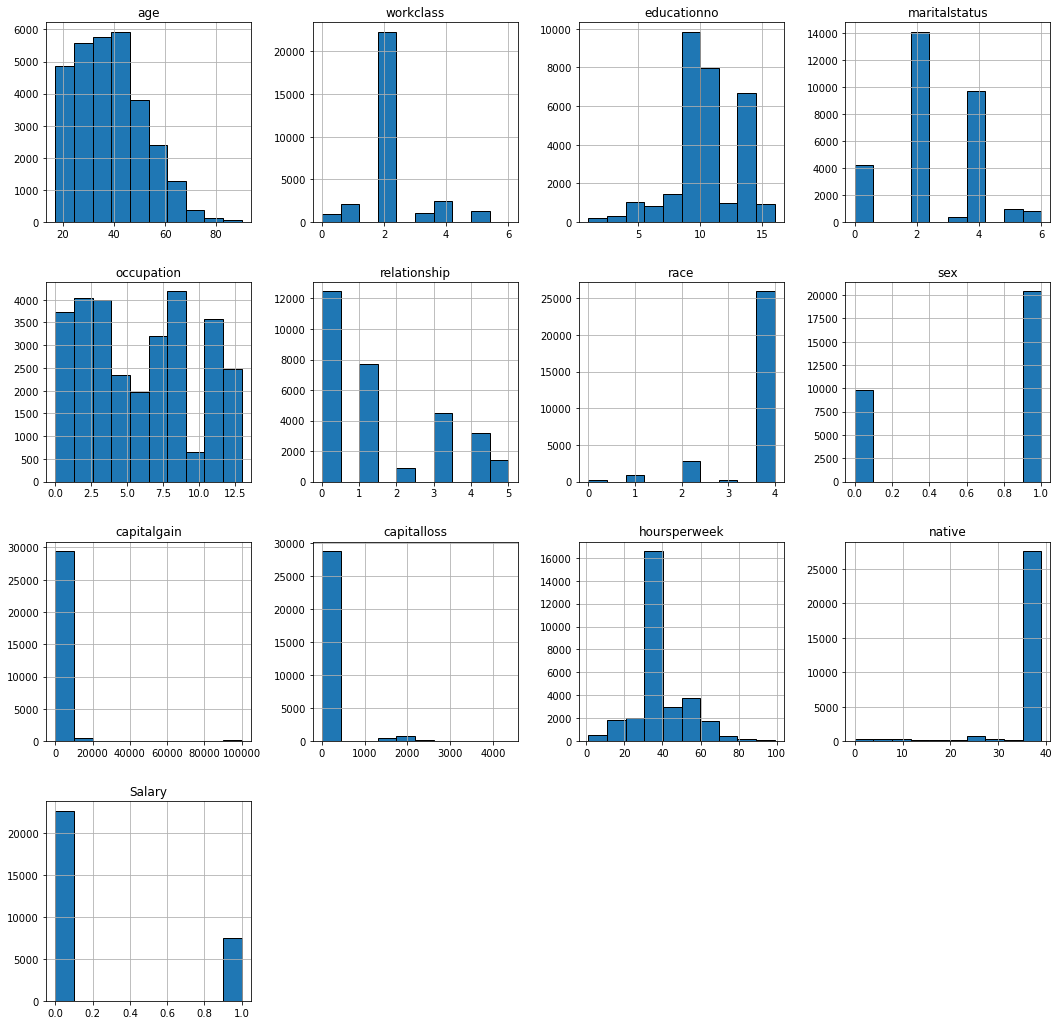

In [121]:
import seaborn as sns
df.hist(edgecolor='black',figsize=(18,18),linewidth=1)

In [122]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [123]:
X

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,13,4,0,1,4,1,2174,0,40,37
1,50,4,13,2,3,0,4,1,0,0,13,37
2,38,2,9,0,5,1,4,1,0,0,40,37
3,53,2,7,2,5,0,2,1,0,0,40,37
4,28,2,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,12,2,12,5,4,0,0,0,38,37
30157,40,2,9,2,6,0,4,1,0,0,40,37
30158,58,2,9,6,0,4,4,0,0,0,40,37
30159,22,2,9,4,0,3,4,1,0,0,20,37


In [124]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int64

In [125]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix


In [126]:
# Splitting the data into training and test dataset

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)


In [127]:
clf=SVC()
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)


Accuracy = 79.23527461597966


array([[6580,  218],
       [1661,  590]])

In [128]:
y_pred=clf.predict (x_test)

In [129]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# SVM Salary (Test_Data)

In [130]:
# import libreries
import pandas as pd
import numpy as np
import seaborn as sns

In [131]:
df1= pd.read_csv('SalaryData_Test(1).csv')

In [132]:
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [133]:
df1.shape

(15060, 14)

In [134]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [135]:
df1['workclass']=df1['workclass'].astype('category')
df1['education']=df1['education'].astype('category')
df1['maritalstatus']=df1['maritalstatus'].astype('category')
df1['occupation']=df1['occupation'].astype('category')
df1['relationship']=df1['relationship'].astype('category')
df1['race']=df1['race'].astype('category')
df1['native']=df1['native'].astype('category')
df1['sex']=df1['sex'].astype('category')

In [136]:
df1.dtypes

age                 int64
workclass        category
education        category
educationno         int64
maritalstatus    category
occupation       category
relationship     category
race             category
sex              category
capitalgain         int64
capitalloss         int64
hoursperweek        int64
native           category
Salary             object
dtype: object

In [137]:
from sklearn import preprocessing


In [138]:
le = preprocessing.LabelEncoder()
df1['workclass']= le.fit_transform(df1['workclass'])
df1['maritalstatus']= le.fit_transform(df1['maritalstatus'])
df1['occupation']= le.fit_transform(df1['occupation'])
df1['relationship']= le.fit_transform(df1['relationship'])
df1['race']= le.fit_transform(df1['race'])
df1['sex']= le.fit_transform(df1['sex'])
df1['native']= le.fit_transform(df1['native'])
df1['Salary']= le.fit_transform(df1['Salary'])

In [139]:
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,11th,7,4,6,3,2,1,0,0,40,37,0
1,38,2,HS-grad,9,2,4,0,4,1,0,0,50,37,0
2,28,1,Assoc-acdm,12,2,10,0,4,1,0,0,40,37,1
3,44,2,Some-college,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,10th,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,Bachelors,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,Bachelors,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,Bachelors,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,Bachelors,13,0,0,3,1,1,5455,0,40,37,0


In [140]:
df1.drop(['education'],axis=1,inplace = True)

In [141]:
df1

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,7,4,6,3,2,1,0,0,40,37,0
1,38,2,9,2,4,0,4,1,0,0,50,37,0
2,28,1,12,2,10,0,4,1,0,0,40,37,1
3,44,2,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,13,0,0,3,1,1,5455,0,40,37,0


In [142]:
df1.Salary.value_counts()

0    11360
1     3700
Name: Salary, dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'workclass'}>,
        <AxesSubplot:title={'center':'educationno'}>,
        <AxesSubplot:title={'center':'maritalstatus'}>],
       [<AxesSubplot:title={'center':'occupation'}>,
        <AxesSubplot:title={'center':'relationship'}>,
        <AxesSubplot:title={'center':'race'}>,
        <AxesSubplot:title={'center':'sex'}>],
       [<AxesSubplot:title={'center':'capitalgain'}>,
        <AxesSubplot:title={'center':'capitalloss'}>,
        <AxesSubplot:title={'center':'hoursperweek'}>,
        <AxesSubplot:title={'center':'native'}>],
       [<AxesSubplot:title={'center':'Salary'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

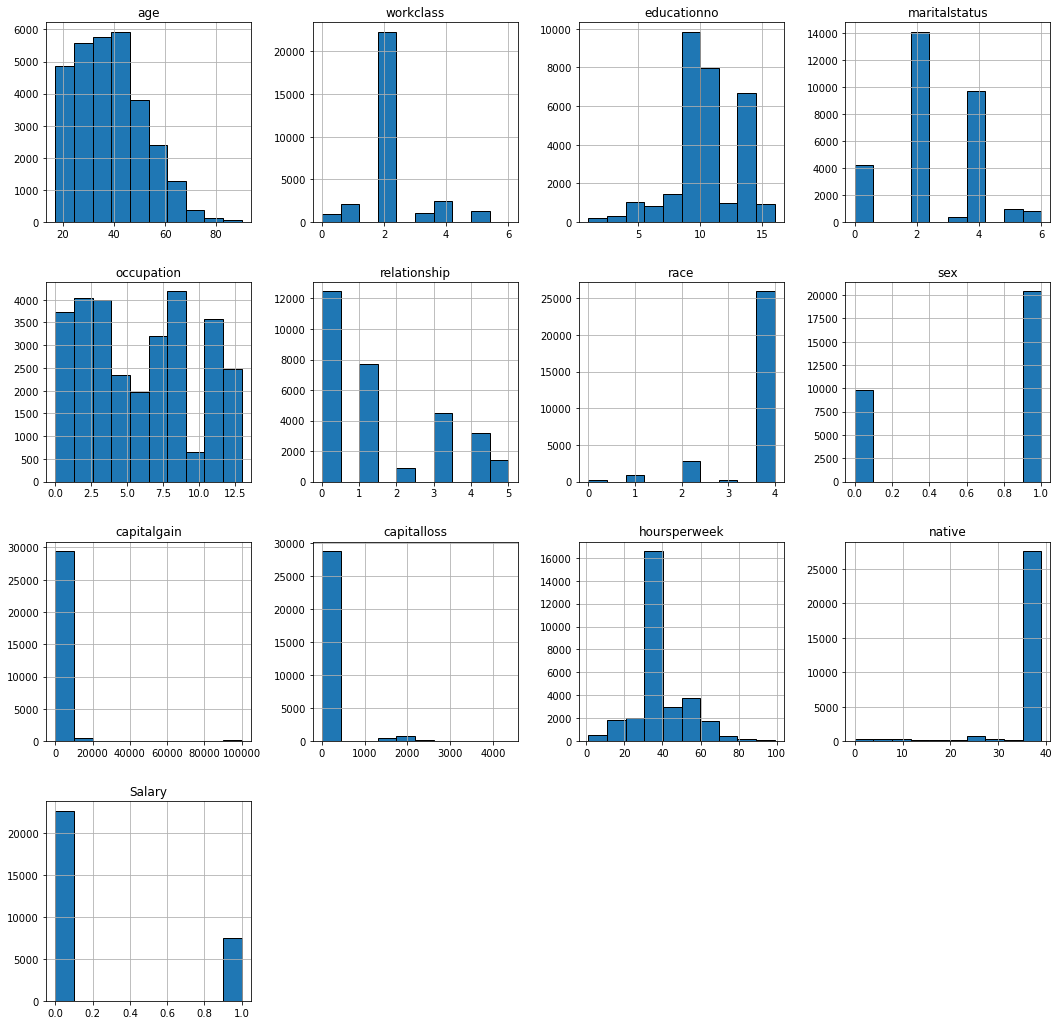

In [143]:
import seaborn as sns
df.hist(edgecolor='black',figsize=(18,18),linewidth=1)

In [144]:
X=df1.iloc[:,:-1]
Y=df1.iloc[:,-1]

In [145]:
X

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,7,4,6,3,2,1,0,0,40,37
1,38,2,9,2,4,0,4,1,0,0,50,37
2,28,1,12,2,10,0,4,1,0,0,40,37
3,44,2,10,2,6,0,2,1,7688,0,40,37
4,34,2,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,13,4,9,3,4,1,0,0,40,37
15056,39,2,13,0,9,1,4,0,0,0,36,37
15057,38,2,13,2,9,0,4,1,0,0,50,37
15058,44,2,13,0,0,3,1,1,5455,0,40,37


In [146]:
Y

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int64

In [147]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix


In [148]:
# Splitting the data into training and test dataset

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [149]:

#model building by using SVM
clf=SVC()
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 79.6812749003984


In [150]:
confusion_matrix(y_test,y_pred)

array([[3290,   95],
       [ 823,  310]])

In [151]:
y_pred=clf.predict (x_test)

In [152]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])